<a href="https://colab.research.google.com/github/payodhi-m/SkyGeni_Assessment/blob/main/SkyGeni_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1 : Problem Framing**

### What do you think is the **real business problem**?

Over the past two quarters, the organization has seen a decline in number of deals that are successfully closed, even when the deal activity has remained strong. That means, the team is spending time and effort on many deals, but only fewer of them are converting into customers.

The goal here is to design a data-driven solution that can help client in:
- Identifying where and why the deals are being lost more often
- Detect pattern linked to lower success rates
- Provide evidence based suggestions on what actions can be taken to improve the win rates


### What key questions should an AI system answer for the client?
- At what stage the deals are failing more than before?
- Are any lead sources producing more low-success rate?
- What types of deals are entering the pipeline?
- Is the success rate drop specific to any region, industry or product?
- Is there a shift in deal cycle
- What factors are most strongly linked to loss
- What action can be taken to improve the performance.


### What metrics matter the most for diagnosing of win rate issue
- **Stage-wise Conversion rate**: Measure the percentage of deals that move from one stage to another and finally converting into win
- **Quality shift Metrix**: Analyse the win rate split based on key deal attributes like *lead_source, region, industry, product_type, sales_rep_id* etc.
- **Sales Cycle lenght**: Measures the number of days between deal creation and closure to highlight client friction

### What assumptions are you making about data or business?
- Deal stages are consistently defined and are regularly updated across all representatives and time period
- The Outcome labels are correct, accurate and promptly recorded for closed deals with no missing data.
- There are no major recent changes in pricing, product, target market that could alter the win behaviour



# **Part 2 :**

### 1. Perform the Exploratory Data Analysis

### 2. Identify atleast
- 3 meaningful business insights
- 2 custom metrics you invent yourself (not just standard ones)

### 3. Explain each insight in plain business language:
- Why does it matter?
- What action could it drive?




In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
sales_data = pd.read_csv('skygeni_sales_data.csv')

In [51]:
sales_data.shape

(5000, 12)

In [52]:
sales_data.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost


In [53]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   deal_id           5000 non-null   object
 1   created_date      5000 non-null   object
 2   closed_date       5000 non-null   object
 3   sales_rep_id      5000 non-null   object
 4   industry          5000 non-null   object
 5   region            5000 non-null   object
 6   product_type      5000 non-null   object
 7   lead_source       5000 non-null   object
 8   deal_stage        5000 non-null   object
 9   deal_amount       5000 non-null   int64 
 10  sales_cycle_days  5000 non-null   int64 
 11  outcome           5000 non-null   object
dtypes: int64(2), object(10)
memory usage: 468.9+ KB


In [54]:
sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
deal_amount,5000.0,26286.4928,27689.230136,2002.0,6611.00,14171.5,39062.25,100000.0
sales_cycle_days,5000.0,63.7518,32.731405,7.0,35.75,64.0,92.00,120.0


In [55]:
sales_data.describe(include='object').T

,count,unique,top,freq
deal_id,5000,5000,D05000,1
created_date,5000,451,2023-03-08,22
closed_date,5000,547,2023-09-20,22
sales_rep_id,5000,25,rep_20,230
industry,5000,5,Ecommerce,1060
region,5000,4,India,1286
product_type,5000,3,Core,1694
lead_source,5000,4,Inbound,1262
deal_stage,5000,5,Demo,1043
outcome,5000,2,Lost,2737


In [56]:
sales_data['deal_id'].duplicated().sum()

np.int64(0)

In [57]:
sales_data.isna().sum()

,0
deal_id,0
created_date,0
closed_date,0
sales_rep_id,0
industry,0
region,0
product_type,0
lead_source,0
deal_stage,0
deal_amount,0


In [58]:
categorical_cols = ['industry', 'region', 'product_type', 'lead_source', 'deal_stage', 'outcome']

for col in categorical_cols:
  print("\n", col, sales_data[col].nunique())
  print(sales_data[col].value_counts().head())


 industry 5
industry
Ecommerce     1060
HealthTech    1010
SaaS          1001
EdTech         992
FinTech        937
Name: count, dtype: int64

 region 4
region
India            1286
APAC             1242
North America    1239
Europe           1233
Name: count, dtype: int64

 product_type 3
product_type
Core          1694
Pro           1676
Enterprise    1630
Name: count, dtype: int64

 lead_source 4
lead_source
Inbound     1262
Referral    1252
Outbound    1246
Partner     1240
Name: count, dtype: int64

 deal_stage 5
deal_stage
Demo           1043
Proposal       1009
Closed          997
Negotiation     995
Qualified       956
Name: count, dtype: int64

 outcome 2
outcome
Lost    2737
Won     2263
Name: count, dtype: int64


In [59]:
sales_data['created_date'] = pd.to_datetime(sales_data['created_date'])
sales_data['closed_date'] = pd.to_datetime(sales_data['closed_date'])

#Normalizing outcome text
sales_data['outcome'] = sales_data['outcome'].str.lower().str.strip()

sales_data['deal_amount'] = pd.to_numeric(sales_data['deal_amount'], errors='coerce')

Sales Cycle days

In [60]:
sales_data['sales_cycle_days'] = (sales_data['closed_date'] - sales_data['created_date']).dt.days


Quaterly and Monthly Buckets

In [61]:
sales_data['created_quarter'] = sales_data['created_date'].dt.to_period("Q")
sales_data['closed_quarter']  = sales_data['closed_date'].dt.to_period("Q")

sales_data['created_month'] = sales_data['created_date'].dt.to_period("M")
sales_data['closed_month']  = sales_data['closed_date'].dt.to_period("M")

Deal Size Band

In [62]:
sales_data['deal_size_band'] = pd.qcut(
    sales_data["deal_amount"],
    q=4,
    labels=["small","medium","large","xlarge"]
)

Win Flag

In [63]:
sales_data['win_flag'] = (sales_data['outcome'] == 'won').astype(int)

Overall Win Rate

In [64]:
overall_win_rate = sales_data['win_flag'].mean()
print(overall_win_rate)


win_trend = (
    sales_data.groupby("closed_quarter")
      .agg(deals=("deal_id","count"),
           wins=("win_flag","sum"))
)

win_trend["win_rate"] = win_trend["wins"] / win_trend["deals"]
print(win_trend)

0.4526
                deals  wins  win_rate
closed_quarter                       
2023Q1            328   146  0.445122
2023Q2            973   438  0.450154
2023Q3           1016   435  0.428150
2023Q4           1027   488  0.475170
2024Q1            990   462  0.466667
2024Q2            637   279  0.437991
2024Q3             29    15  0.517241


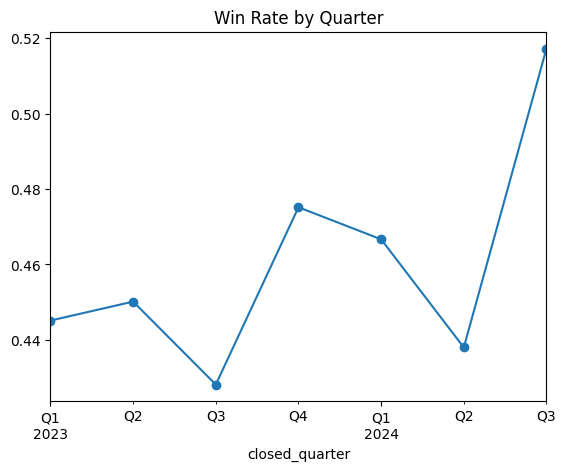

In [65]:
win_trend["win_rate"].plot(marker="o")
plt.title("Win Rate by Quarter")
plt.show()

Pipeline volume vs Win Rate

In [66]:
volume_trend = (
    sales_data.groupby("created_quarter")
      .agg(
          deals_created=("deal_id","count"),
          avg_deal_size=("deal_amount","mean")
      )
)

print(volume_trend)

                 deals_created  avg_deal_size
created_quarter                              
2023Q1                    1006   25135.265408
2023Q2                    1014   26741.178501
2023Q3                    1006   26217.793241
2023Q4                    1013   26631.349457
2024Q1                     961   26720.265349


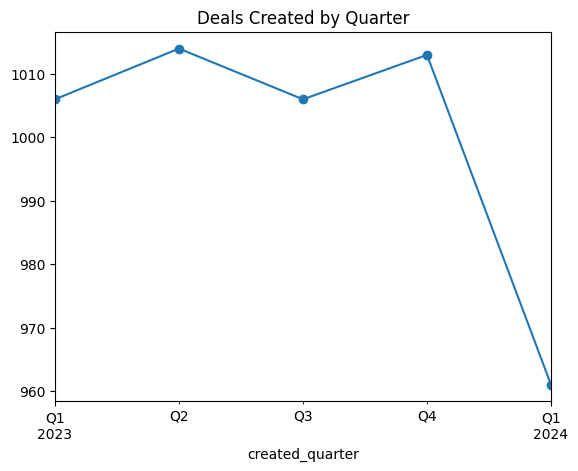

In [67]:
volume_trend["deals_created"].plot(marker="o")
plt.title("Deals Created by Quarter")
plt.show()

Quality Shift metrices based on different attributes

In [68]:
def attribute_based_win_rate(df, col):
    out = (
        sales_data.groupby(col)
          .agg(
              deals=("deal_id","count"),
              win_rate=("win_flag","mean"),
              median_cycle=("sales_cycle_days","median"),
              median_amount=("deal_amount","median")
          )
          .sort_values("deals", ascending=False)
    )
    return out


==== region ====


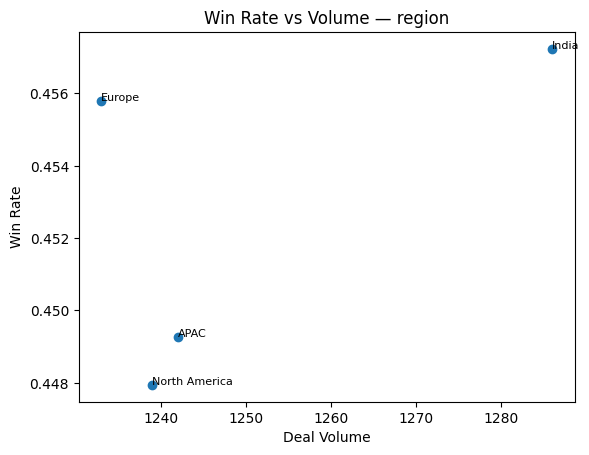


==== industry ====


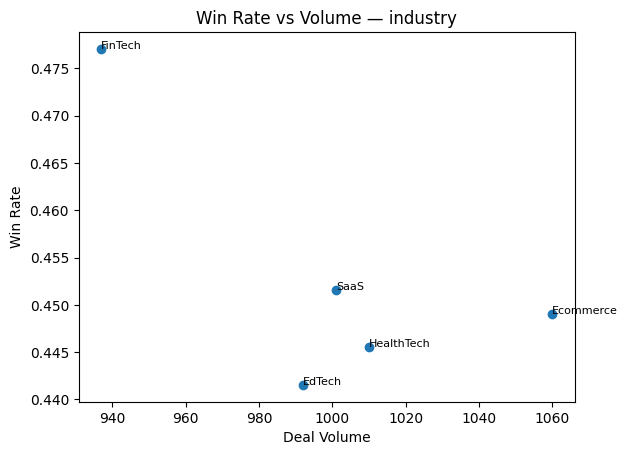


==== product_type ====


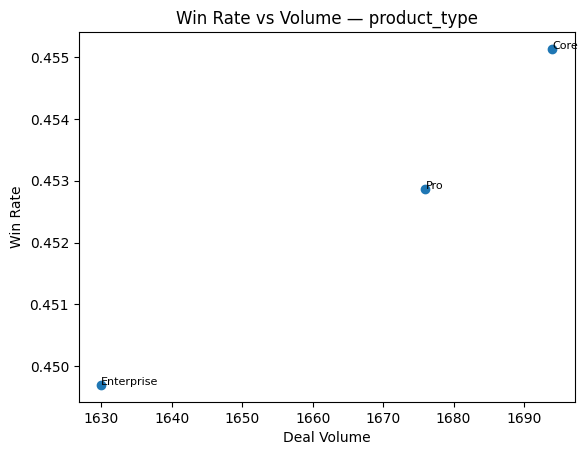


==== lead_source ====


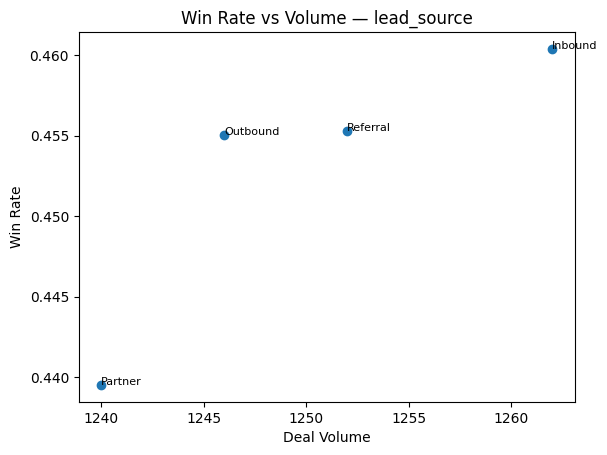


==== deal_size_band ====


/tmp/ipython-input-3622376722.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_data.groupby(col)


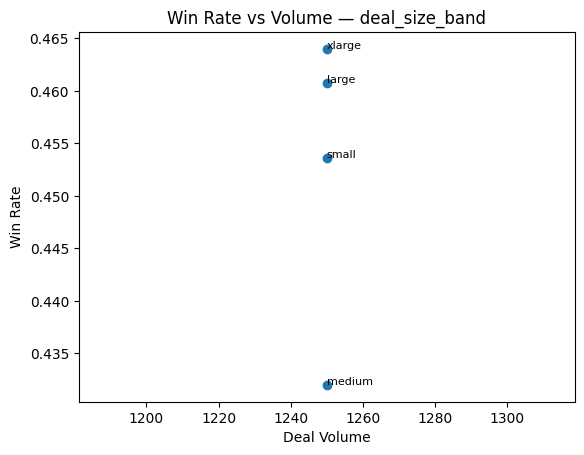

In [98]:
attribute_list = ['region', 'industry', 'product_type', 'lead_source', 'deal_size_band']

for c in attribute_list:
  seg = attribute_based_win_rate(sales_data, c).reset_index()
  print("\n====", c, "====")

  seg = seg[seg["deals"] >= 20]

  plt.figure()
  plt.scatter(seg["deals"], seg["win_rate"])

  for i, row in seg.iterrows():
      plt.text(row["deals"], row["win_rate"], str(row[c]), fontsize=8)

  plt.xlabel("Deal Volume")
  plt.ylabel("Win Rate")
  plt.title(f"Win Rate vs Volume — {c}")
  plt.show()

Based on the charts generated above, the following performance insights can be concluded:
- FinTech has higher win rate while EdTech is the lowest. That means FinTech is converting better win rate with same level of effort than EdTech
- Inbound and Referral leads are converting the best while Partner-sourced deals are converting the worst despite similar deal counts.
- Higher value deals have higher sales cycle length and they are more likely to close.
- Region and product-type win rates are very close to each other which indicates that win-rate drop problem is not directly associated with geography or product tier. They are more driven by industry, lead source quality and deal size distribution

Sales Cycle Analysis

In [70]:
sales_data.groupby('outcome')['sales_cycle_days'].describe()

,count,mean,std,min,25%,50%,75%,max
outcome,,,,,,,,
lost,2737.0,64.230179,32.545913,7.0,37.0,64.0,93.0,120.0
won,2263.0,63.173221,32.952274,7.0,34.0,63.0,91.5,120.0


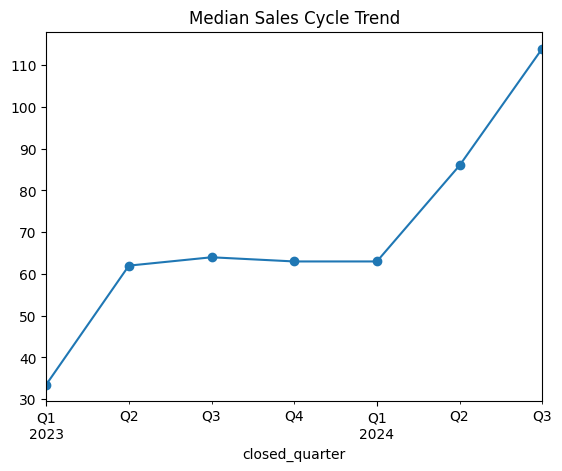

In [71]:
cycle_trend = sales_data.groupby("closed_quarter")['sales_cycle_days'].median()
cycle_trend.plot(marker="o")
plt.title("Median Sales Cycle Trend")
plt.show()

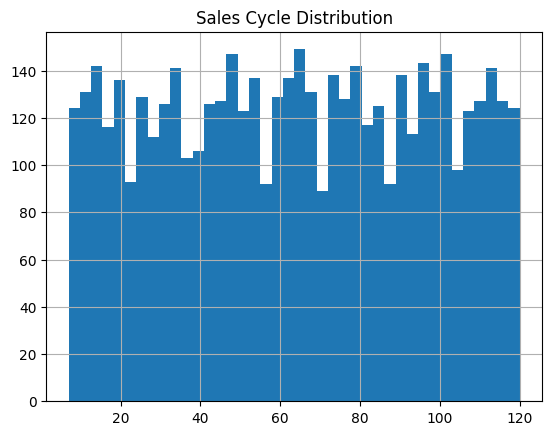

In [72]:
sales_data['sales_cycle_days'].hist(bins=40)
plt.title("Sales Cycle Distribution")
plt.show()

Sales Representative Performance

In [73]:
rep_perf = (
    sales_data.groupby('sales_rep_id')
      .agg(
          deals=("deal_id","count"),
          win_rate=("win_flag","mean"),
          median_cycle=("sales_cycle_days","median"),
          avg_amount=("deal_amount","mean")
      )
      .sort_values("win_rate", ascending=False)
)

print(rep_perf)

              deals  win_rate  median_cycle    avg_amount
sales_rep_id                                             
rep_21          208  0.509615          65.0  23265.250000
rep_12          180  0.483333          58.5  30786.877778
rep_8           187  0.481283          66.0  26469.358289
rep_19          196  0.479592          67.0  27310.642857
rep_3           216  0.472222          63.0  24243.740741
rep_16          223  0.470852          65.0  25545.623318
rep_20          230  0.469565          61.0  27177.886957
rep_11          200  0.465000          69.0  30268.255000
rep_2           221  0.461538          59.0  28477.212670
rep_4           203  0.458128          66.0  25590.911330
rep_5           201  0.457711          68.0  28776.368159
rep_1           211  0.454976          70.0  25240.521327
rep_25          205  0.453659          56.0  26716.800000
rep_24          203  0.448276          58.0  23912.216749
rep_9           186  0.446237          62.0  25269.639785
rep_15        

Deal Size vs Outcome

In [74]:
sales_data.groupby("outcome")["deal_amount"].median()

size_win = attribute_based_win_rate(sales_data, "deal_size_band")
print(size_win)

                deals  win_rate  median_cycle  median_amount
deal_size_band                                              
small            1250    0.4536          62.0         4311.0
medium           1250    0.4320          64.0         9765.0
large            1250    0.4608          64.0        18495.0
xlarge           1250    0.4640          65.0        70287.5


/tmp/ipython-input-3622376722.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_data.groupby(col)


Loss Concentration

In [75]:
loss_df = sales_data[sales_data['win_flag'] == 0]

loss_share = sales_data['lead_source'].value_counts(normalize=True)
print(loss_share)

lead_source
Inbound     0.2524
Referral    0.2504
Outbound    0.2492
Partner     0.2480
Name: proportion, dtype: float64


Quarter by Quarter win rate change over different attributes

In [76]:
attr_qtr = (
    sales_data.groupby(['closed_quarter', 'industry'])
      .agg(win_rate=('win_flag','mean'))
      .reset_index()
)

pivot = attr_qtr.pivot(index="industry", columns="closed_quarter", values="win_rate")
print(pivot)

closed_quarter    2023Q1    2023Q2    2023Q3    2023Q4    2024Q1    2024Q2  \
industry                                                                     
Ecommerce       0.454545  0.437500  0.438914  0.454128  0.478261  0.418803   
EdTech          0.507246  0.462766  0.396985  0.456853  0.443350  0.395349   
FinTech         0.406780  0.449438  0.489362  0.510526  0.507853  0.440945   
HealthTech      0.438356  0.429268  0.385027  0.502304  0.456410  0.461538   
SaaS            0.409836  0.477528  0.429864  0.453659  0.448454  0.470149   

closed_quarter    2024Q3  
industry                  
Ecommerce       0.571429  
EdTech          0.857143  
FinTech         0.250000  
HealthTech      0.000000  
SaaS            0.500000  


# **Part 3: Building the Decision Engine**

### Revenue Forecast: Problem Statement
Designing a decision engine that can predict the expected revenue for the next phase based on current pipeline and previous win behavior.

For the purpose of this assignment, I would be designing a Rule-based system that would estimate the win probability of the open deal using attributes like deal_stage, industry, deal_size_band, lead_sources. The computed win probability will be used to compute the probability-weighted expected revenue.



In [77]:
sales_data.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,created_quarter,closed_quarter,created_month,closed_month,deal_size_band,win_flag
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,won,2023Q4,2023Q4,2023-11,2023-12,small,1
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,won,2023Q1,2023Q1,2023-01,2023-01,small,1
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,lost,2023Q4,2023Q4,2023-10,2023-12,medium,0
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,won,2023Q3,2023Q3,2023-07,2023-08,small,1
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,lost,2024Q1,2024Q2,2024-02,2024-05,xlarge,0


Building Historical Reference set

In [78]:
closed_deals = sales_data[(sales_data['deal_stage'] == "Closed") & (sales_data['outcome'].isin(['won', 'lost']))].copy()

In [79]:
print("Number of closed deals: ", len(closed_deals))

Number of closed deals:  997


Staging win rates

In [80]:
stage_wr = closed_deals.groupby('deal_stage')['win_flag'].mean()

Lead source win rate

In [81]:
source_wr = closed_deals.groupby('lead_source')['win_flag'].mean()

Industry win rate

In [82]:
industry_wr = closed_deals.groupby('industry')['win_flag'].mean()

Deal size win rate

In [83]:
dealSize_wr = closed_deals.groupby('deal_size_band')['win_flag'].mean()

/tmp/ipython-input-2453430409.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dealSize_wr = closed_deals.groupby('deal_size_band')['win_flag'].mean()


Global Fallback

In [84]:
global_wr = closed_deals['win_flag'].mean()

Defining the lookup function

In [85]:
def lookup_function(series, key, default):
  if key in series.index:
    return series.loc[key]
  return default

Rule-Based Probability function

In [86]:
def estimate_win_prob(row):
  values = [
      lookup_function(source_wr, row['lead_source'], global_wr),
      lookup_function(industry_wr, row['industry'], global_wr),
      lookup_function(dealSize_wr, row['deal_size_band'], global_wr),
  ]

  return np.mean(values)

Scoring all deals

In [87]:
sales_data['win_prob_estimate'] = sales_data.apply(estimate_win_prob, axis=1)

Selecting Active Pipeline deals

In [88]:
active_stages = ['Qualified', 'Demo', 'Proposal', 'Negotiation']

active_deals = sales_data[sales_data['deal_stage'].isin(active_stages)].copy()

print("Active deals for the forecast: ", len(active_deals))

Active deals for the forecast:  4003


Expected Revenue Forecast

In [89]:
active_deals['expected_revenue'] = active_deals['deal_amount'] * active_deals['win_prob_estimate']

forecast_total = active_deals['expected_revenue'].sum()

print(f"Expected Revenue Forecast: ${forecast_total:,.0f}")

Expected Revenue Forecast: $49,051,234


Revenue Forecast by Stage

In [90]:
forecast_by_stage = ((active_deals.groupby('deal_stage')['expected_revenue']).sum().sort_values(ascending=False))/1_00_000
print("Revenue forecast by Stage", forecast_by_stage.round(2), "Million USD")

Revenue forecast by Stage deal_stage
Demo           127.57
Negotiation    124.30
Qualified      120.24
Proposal       118.41
Name: expected_revenue, dtype: float64 Million USD


Revenue forecast by Sales Representative

In [91]:
forecast_by_rep = (active_deals.groupby('sales_rep_id')['expected_revenue']).sum().sort_values(ascending=False)/1_00_000
print("Revenue forcast by Representative: ", forecast_by_rep.round(2), "Million USD")

Revenue forcast by Representative:  sales_rep_id
rep_2     25.81
rep_6     23.56
rep_5     22.84
rep_20    22.52
rep_1     21.64
rep_16    21.47
rep_11    21.42
rep_12    21.40
rep_19    21.16
rep_7     20.57
rep_25    20.39
rep_8     19.27
rep_23    19.06
rep_14    18.88
rep_17    18.59
rep_4     18.58
rep_3     18.12
rep_21    18.09
rep_22    17.55
rep_18    17.06
rep_9     16.91
rep_13    16.51
rep_15    16.51
rep_10    16.36
rep_24    16.26
Name: expected_revenue, dtype: float64 Million USD


Revenue forecast by Lead Source

In [92]:
forecast_by_source = (active_deals.groupby('lead_source')['expected_revenue']).sum()/1_00_000
print("Revenue forcast by Lead source: ", forecast_by_source.round(2), "Million USD")

Revenue forcast by Lead source:  lead_source
Inbound     126.13
Outbound    117.07
Partner     120.98
Referral    126.33
Name: expected_revenue, dtype: float64 Million USD


Decision Rule layer - Risk Flag

In [93]:
active_deals['risk_flag'] = np.where(active_deals['win_prob_estimate'] < .30,
                                     "HIGH_RISK",
                                     "NORMAL")

Large deal priority

In [94]:
threshold = active_deals['deal_amount'].quantile(0.75)

active_deals['priority_flag'] = np.where(active_deals['deal_amount'] >= threshold, "PRIORITY", "")

Final Decision Table

In [95]:
decision_table = active_deals[[
    'deal_id',
    'deal_stage',
    'deal_amount',
    'win_prob_estimate',
    'expected_revenue',
    'risk_flag',
    'priority_flag',
    'sales_rep_id'
]].sort_values("expected_revenue", ascending=False)

In [96]:
decision_table.head(30)

,deal_id,deal_stage,deal_amount,win_prob_estimate,expected_revenue,risk_flag,priority_flag,sales_rep_id
1732,D01733,Demo,99691,0.489684,48817.038669,NORMAL,PRIORITY,rep_3
225,D00226,Proposal,98240,0.495523,48680.163672,NORMAL,PRIORITY,rep_13
2684,D02685,Negotiation,99214,0.489684,48583.459635,NORMAL,PRIORITY,rep_3
1162,D01163,Demo,99970,0.485488,48534.227549,NORMAL,PRIORITY,rep_11
840,D00841,Demo,98924,0.489684,48441.451418,NORMAL,PRIORITY,rep_19
2080,D02081,Demo,97612,0.495523,48368.975330,NORMAL,PRIORITY,rep_7
2779,D02780,Qualified,99886,0.481451,48090.181747,NORMAL,PRIORITY,rep_14
2554,D02555,Qualified,97021,0.495523,48076.121332,NORMAL,PRIORITY,rep_6
3991,D03992,Negotiation,99408,0.479034,47619.803428,NORMAL,PRIORITY,rep_21
3464,D03465,Negotiation,99234,0.479034,47536.451527,NORMAL,PRIORITY,rep_17


Using this Rule based system, the sales leaders can
- Get a realistic forecast of revenue generated in next period
- Identify high values deals with low win probability
- Focus representative efforts on high priority deals
- Check if any lead source is hurting the forecast quality
- Reallocate resources across deal stages

# **Part 4 - Mini System Design**

The objective of this assignment is to design a lightweight sales insight and alert system that can continuously monitor deals and highlight early the reason behind decline in win rates or potential revenue risk.


### High-level Architecture:
This system should run on sales data and perform analytics and rule checking periodically.

Deal Data<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&darr;<br>
Data Extraction<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&darr;<br>
Data Cleaning and Validation<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&darr;<br>
Feature Engineering Layer<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&darr;<br>
Insight Engine<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&darr;<br>
Rule Based Alert Engine<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&darr;<br>
Output Channels<br>
(Dashboards, Email alerts, reports)<br>


**Component Summary:**
- Deal Data: Pulls all historic and active deal attributes; Can be run on a schedule
- Data Cleaning and Validation: Cleans the data fields, validate stage and outcome values and builds derived metrics; If any failure occur during validation it can be flagged on this stage
-  Feature Engineering: System can compute derived attributes here that are necessary for generating insights and store it in processed table.
- Insight Engine: Generates the necessary insights like comparing last 2 quarter vs previous baseline, segment win rate vs global win rate
- Rule based Alert Engine: Rules will trigger alerts if the conditions are met
- Output Channels: The alerts are pushed to dashboard, Email notification or into the logs based on the priority


**Example Alerts and Insights**
- Win Rate Drop Alert: Win rate in a specific industry dropped significantly compared to historic data
- Pipeline Risk Alert: If major portion of expected revenue is concentrated in early deal stage
- Representative Performance Shift Alert: If the representatives win rate is significantly below their historical average
- Lead Source Quality Alert: If any lead source is generating high volume but low win conversion
- Deal Aging Alert: Deals are stuck in a specific stage for too long beyond normal duration

**How often it runs**<br>
This system need not be real-time as deal status usually change slowly, sales based decisions are not made minute by minute. Running the system in batch would make it more cheaper and stable. Hence on a daily basis, the system can referesh metrics, recompute the forecast, evaluate the alert rules and generate daily alert summary. More deeper scans like trend shifts, representatives performance, segment based shift can be computed once every week.

**Failure Cases and Limitations**
- Data Quality Dependency: If the data updation has inconsistency or is delayed it might result in data becoming unreliable, win rate calculation will get impacted and alerts could be misleading.
- Stage Definition Changes: If the sales stages are redefined then historical comparison would break
- Rule based Model might not be able to capture complex relationship among the variables
- Forecast Sensitivity: The forecasting assumes historical data remains stable.




# **Part 5 - Reflection**

1. **What assumption in your solution is the weakest?<br>**
The assumption that historical win data will remain stable and predictive seems to be one of the weak assumptions. Since the rule based system and insight engine alert system both relies heavily on historical data, in reality these patterns tend to change quickly due to various factors *(pricing change, competition, new product release)*. If these changes occur, the probability estimation and alerts will become misleading even if the overall system works correctly.

2. **What would break in real-world production?<br>**
- As the designed system is metrics driven, even a slight data quality failure would corrupt the insights and alerts.
- Any process definition related changes like renaming sales stages would result in invalidating the historic data and stage based comparison.
- Delayed data referesh or partial data extraction can result in incorrect forecast.

3. **What would you build next if given 1 month?<br>**
- Upgrade the rule based system to a Machine learning based Probability model
- In alerting system, a recommendation layer can be added to suggest appropriate action to be taken to mitigate the issue
- A frontend displaying dashboard that provides forecast breakdown view, alert history tracking can be implemented to increase usability.

4. **What part of your solution are you least confident about?<br>**
The part that I am least confident about is the rule based probability estimation of revenue. The solution is designed based on various data based assumptions that could result in failure in real world environment. Also, I think the rule based system would not be able to capture the non-linear relationship among attributes and hence unable to automatically adapt to change. This is a lightweight version that can be enhanced using ML based techniques to make it more production stable.
